<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Parcial3/Ejercicio_Parcial_hidden_markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [436]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [437]:
from tqdm.notebook import tqdm

In [438]:
T=np.array([[0.8,0.2],\
            [0.2,0.8]])

In [439]:
E=np.array([[0.5,0.9],\
            [0.5,0.1]])

In [440]:
inicial=np.array([0.2,0.8])

In [441]:
Dict={0:"J", 1:"B"}

In [442]:
secuencia=np.array(["S","C","C","C","S","C","S","C"])

In [443]:
posicion=[]
for i in range(len(secuencia)):
  if secuencia[i]=="S":
    posicion.append(1)
  else:
    posicion.append(0)
posicion

[1, 0, 0, 0, 1, 0, 1, 0]

In [444]:
def hiden_states( H, O, T, E, I):
  P = 1.
  for i in range(len(H)):
    P*=E[O[i], H[i]]
    if i:
      P*=T[H[i], H[i-1]]
  #for j in range(1,len(H)):
  #  P*=T[O[j], O[j-1]]
  Tot=P*I[H[0]]
  return Tot


In [445]:
import itertools

H=O=list(itertools.product([0,1],[0,1],[0,1],[0,1],[0,1], [0,1], [0,1], [0,1]))


In [446]:
probH=[]
for i in range(len(H)):
  probH.append(hiden_states(H[i], posicion, T, E, inicial))

In [447]:
s=H[np.argmax(probH)]
s

(1, 1, 1, 1, 0, 0, 0, 0)

In [448]:
print("Secuencia mas probable: ")
for i in range(len(s)):
  if s[i]==1:
    print("Moneda: ",Dict[1])
  else:
    print("Moneda: ",Dict[0])

Secuencia mas probable: 
Moneda:  B
Moneda:  B
Moneda:  B
Moneda:  B
Moneda:  J
Moneda:  J
Moneda:  J
Moneda:  J


In [449]:
hiden_states(s,posicion,T,E,inicial) # Probabilidad de mejor secuencia
print("Probabilidad de la secuencia: ",hiden_states(s,posicion,T,E,inicial))

Probabilidad de la secuencia:  0.00019110297600000013


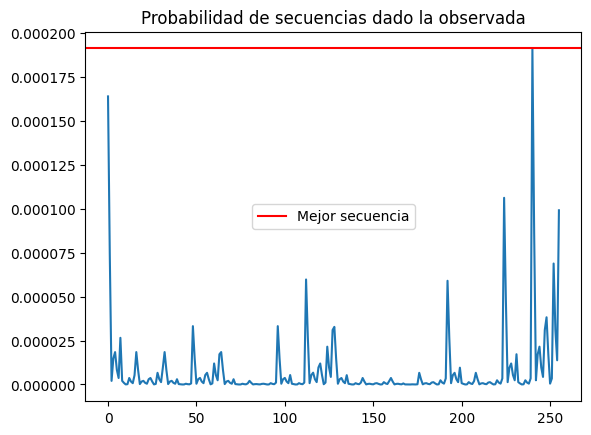

In [450]:
plt.plot(probH)
plt.title("Probabilidad de secuencias dado la observada")
plt.axhline(y=np.max(probH), color="red", label="Mejor secuencia")
plt.legend()

In [451]:
General=pd.DataFrame()
General["Secuencia"]=H
General["Probabilidad"]=probH

In [452]:
General["P real"]=General["Probabilidad"]/General["Probabilidad"].sum()
General["P real"].sum()

1.0000000000000002

In [453]:
General=General.sort_values(by="P real", ascending=False)

In [454]:
General["Acumulada"]=General["P real"].cumsum()
General

,Secuencia,Probabilidad,P real,Acumulada
240,"(1, 1, 1, 1, 0, 0, 0, 0)",1.911030e-04,9.878991e-02,0.098790
0,"(0, 0, 0, 0, 0, 0, 0, 0)",1.638400e-04,8.469643e-02,0.183486
224,"(1, 1, 1, 0, 0, 0, 0, 0)",1.061683e-04,5.488328e-02,0.238370
255,"(1, 1, 1, 1, 1, 1, 1, 1)",9.906778e-05,5.121269e-02,0.289582
241,"(1, 1, 1, 1, 0, 0, 0, 1)",8.599634e-05,4.445546e-02,0.334038
...,...,...,...,...
138,"(1, 0, 0, 0, 1, 0, 1, 0)",5.120000e-09,2.646763e-06,0.999995
171,"(1, 0, 1, 0, 1, 0, 1, 1)",4.147200e-09,2.143878e-06,0.999997
42,"(0, 0, 1, 0, 1, 0, 1, 0)",2.880000e-09,1.488804e-06,0.999998
74,"(0, 1, 0, 0, 1, 0, 1, 0)",2.880000e-09,1.488804e-06,1.000000


In [455]:
print("Secuencias conjuntas del 20%: ")
A=General[General["Acumulada"]<=0.2]
A=A["Secuencia"]
for j in range(len(A)):
  B=A.iloc[j]
  print("Secuencia ", j+1)
  for i in range(len(B)):
    if B[i]==1:
      print(Dict[1])
    else:
      print(Dict[0])

Secuencias conjuntas del 20%: 
Secuencia  1
B
B
B
B
J
J
J
J
Secuencia  2
J
J
J
J
J
J
J
J


In [456]:
probO=[]
for j in tqdm(range(len(O))):
  probH=[]
  for i in range(len(H)):
    probH.append(hiden_states(H[i], O[j], T, E, inicial))
  probO.append(np.sum(probH))

  0%|          | 0/256 [00:00<?, ?it/s]

In [457]:
np.sum(probO)

1.0000000000000007

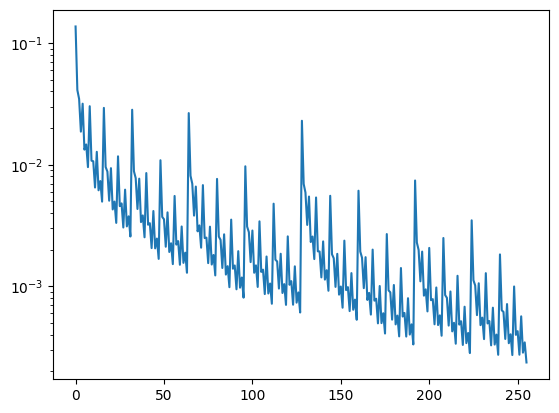

In [458]:
plt.plot(probO)
plt.yscale("log")

In [459]:
probS=[]
for j in tqdm(range(len(O))):
  probH=[]
  for i in range(len(H)):
    probH.append(hiden_states(H[i], O[j], T, E, [0.01,0.99]))
  probS.append(np.sum(probH))

  0%|          | 0/256 [00:00<?, ?it/s]

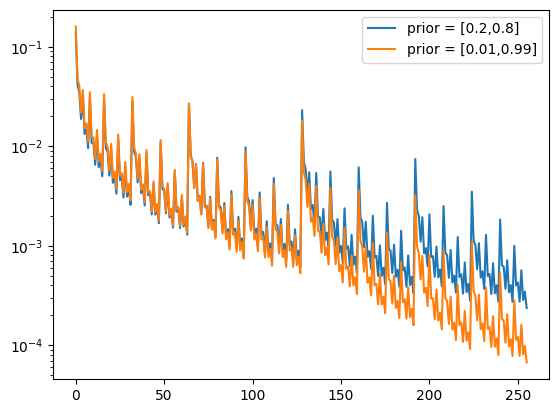

In [460]:
plt.plot(probO,label="prior = [0.2,0.8]")
plt.plot(probS,label="prior = [0.01,0.99]")
plt.yscale("log")
plt.legend()

In [461]:
#Si depende del priori, aunque esto se ve mas claramente con casos extremos
# es evidente que si bien se sigue el mismo patrón hay un ligero desface frente a las probabilidades.
# Esto porque la probabilidad a priori determina el lugar de inicio desde el que se puede empezar a trabajar
#y por lo tanto si se mueve ese inicio se desfazaran los datos como se muestra en el grafico de arriba.

In [462]:
# Si tubiera que hacer este calculo por tantedo y de manera analitica, creo que la mejor forma seria con robots.
# Asi se crearian muchos robots con la misma concicion inicial, y que dependiendo de la probabilidad de transcicion o emicion se desplacen a otro estado.
# Y asi tambien emitan un cierto resultado, despues de un tiempo t=8 se miraria en que estado estan los robots y contando la cantidad en cada estado,
#y dividiendo por el total de robots, se podrian calcular las probabilidades de cada secuencia haciendo con cada una el mismo proceso.